# 447 Sp21 exam 1 due 5p Fri May 7

***Instructions:***
- Solutions with just the answer to the question **will not** be accepted as complete solutions -- you must show your work. If you are unsure as to how much work is appropriate to show, please come and ask questions during classtime or office hours.
- Each subproblem is worth two points, 1 point for effort and 1 point for solution accuracy.
- Submit BOTH the pdf and the .ipynb notebook to canvas. You can download the .ipynb notebook by going to ```File```$\rightarrow$ ```Download``` $\rightarrow$```Download .ipynb```.


***You are welcome (and encouraged) to:***
- use analytical and numerical computational tools -- specify the tool(s) in sourcecode and/or text;
- reuse example sourcecode and other materials provided in this course;
- consult textbooks, websites, and other publicly-available materials -- include full citation(s) with the URL and/or [DOI](https://en.wikipedia.org/wiki/Digital_object_identifier).

***You are not permitted to discuss the exam problems or share any part of your solutions with anyone other than the Professor or TA for this course.***
- By submitting your exam solution on Canvas, you are affirming your understanding of and adherence to these restrictions.
- We will answer questions during classtimes Monday May 3 and Wednesday May 5.
- We will also answer questions sent to our Canvas inbox or Discord DM until 5p Fri May 7.

***The exam deadline is 5p Fri May 7 on Canvas.***
- Final submissions received before this deadline will receive +1 bonus points.
- Everyone automatically receives a deadline extension to 11:59p Sun May 9. ***No further deadline extensions will be granted -- please plan accordingly.***

## problem (1.)

Sometimes, the measured output $y_{meas}$ is not the same as the output of the feedback system $y_{actual}$ due to sensor dynamics. We can model the sensor dynamics using a transfer function $H$, which is demonstrated in the following block diagram: 

![block diagram](https://drive.google.com/uc?id=1dXLVNmik117Wt_g6armzFiFlLPaSvPE3)

### subproblem (1a.)

Determine the transfer function $G_{y_{actual}r}$ from $r$ to $y_{actual}$.

solution:
same as what we did in homework. we assume ymeas=yactual and v=0. sum when fed into (+) block and multiplication when fed into other blocks. 
$G_{yr} =\frac{PC}{1+PC}$



### subproblem (1b.)

Let the process $P(s) = \frac{K}{(Js+b)(Ls+R)+K^2}$ (i.e., a DC motor with moment of inertia $J$, motor viscous friction constant $b$, electric resistance $R$, electric inductance $L$, and motor torque and back emf constants $K$), the controller $C(s) = k_P+k_Ds$ (i.e., a proportional-derivative controller), and the sensor dynamics $H(s) = 1$ (i.e. a perfect sensor). Assume <mark>the initial states of the process are equal to 0</mark> -- if a step input is applied to $G_{y_{actual}r}$ that you found in (1a.), what is the steady-state output? (If you couldn't find $G_{y_{actual}r}$ in (1a.), assume $G_{y_{actual}r}=\frac{PC}{1+PC}$.)

solution:
$G_{yr} = \frac{\frac{(k_P+k_Ds)K}{(Js+b)(Ls+R)+K^2}}{1+\frac{(k_P+k_Ds)K}{(Js+b)(Ls+R)+K^2}} = \frac{(k_P+k_Ds)K}{(Js+b)(Ls+R)+K^2+(k_P+k_Ds)K} = \frac{(k_P+k_Ds)K}{JLs^2+RJs+Lbs+bR+K^2+k_PK+k_DsK}= \frac{(k_P+k_Ds)K}{JLs^2+(RJ+Lb+k_DK)s+(bR+K^2+k_PK)} = \frac{(Kk_D)s+(Kk_P)}{(JL)s^2+(RJ+Lb+k_DK)s+(bR+K^2+k_PK)}$
$r(s)=\frac{1}{s}$ for Heaviside Step function as input $r$

$\frac{y(s)}{r(s)} \equiv G_{yr}(s) $
$ y(s) = G_{yr}(s)r(s) = \frac{1}{s} \frac{(Kk_D)s+(Kk_P)}{(JL)s^2+(RJ+Lb+k_DK)s+(bR+K^2+k_PK)} $

final value theorem:
$ \lim_{t\to \infty} y(t) = \lim_{s\to 0} sy(s) $

so: 
$ \lim_{t\to \infty} y(t) = \lim_{s\to 0} s \frac{1}{s} \frac{(Kk_D)s+(Kk_P)}{(JL)s^2+(RJ+Lb+k_DK)s+(bR+K^2+k_PK)} = \lim_{s\to 0} \frac{(Kk_D)s+(Kk_P)}{(JL)s^2+(RJ+Lb+k_DK)s+(bR+K^2+k_PK)} = \frac{(Kk_D)0+(Kk_P)}{(JL)0+(RJ+Lb+k_DK)0+(bR+K^2+k_PK)} = \frac{Kk_P}{bR+K^2+k_PK} = \frac{k_P}{\frac{bR}{K}+K+k_P}  $

### subproblem (1c.)

Let $J=1, b=0.1, K=0.01, R= 1, L=0.5$ and hold $k_D=1$ constant. Plot the root locus of the closed-loop characteristic polynomial as $k_P$ varies.

solution:
characteristic polynomial:
$ (JL)s^2+(RJ+Lb+k_DK)s+(bR+K^2+k_PK) $
roots from quadratic formula:

$ \frac{-(RJ+Lb+k_DK) \pm \sqrt{(RJ+Lb+k_DK)^2-4JL(bR+K^2+k_PK)}}{2JL} $

$ A = JL = 0.5 $

$ B = RJ+Lb+k_DK = 1+0.05+0.01 = 1.06 $

$ C = bR+K^2 + k_PK = 0.1+0.0001+0.01k_P = 0.1001 + 0.01k_P $

quadratic formula:

$ \frac{-B \pm \sqrt{B^2-4AC}}{2A} $

$ \frac{-1.06 \pm \sqrt{1.06^2-2C}}{1} =  -1.06 \pm \sqrt{1.1236-2C}$

$ -1.06 \pm \sqrt{1.1236-0.2002-0.02k_P} = -1.06 \pm \sqrt{0.9234-0.02k_P} $

see code cell for plot

### subproblem (1d.)
Determine the range of $k_P$ that results in a stable closed-loop system *with the real part of the roots less than $-0.5$*. You may do this analytically (e.g. pen-and-paper) or numerically (e.g. using the root locus from (1c.)). If you could not get a solution for subproblem 1a, use $G_{y_{actual}r} = \frac{PC}{1+PC}$.

solution: two cases to consider: first case when thing in square root is assumed to be non-negative. in that case, the only way to be larger than -0.5 is if thing in square root term is greater than 0.56, and thus:
$0.56^2 < 0.9234-0.02k_P $
plug into wolframalpha at this point: 0.56^2 < 0.9234 - 0.02x and you'll see that this holds true as long as x = $k_P$ < 30.49. as long as $k_P$ > 30.49, real part of root is less than -0.5.
second case to consider is when thing in square root is assumed to be negative. in that case, the real part of the root is -1.06 < -0.5. So as long as $k_P > 30.49 $ we will have stability consistent with question. 

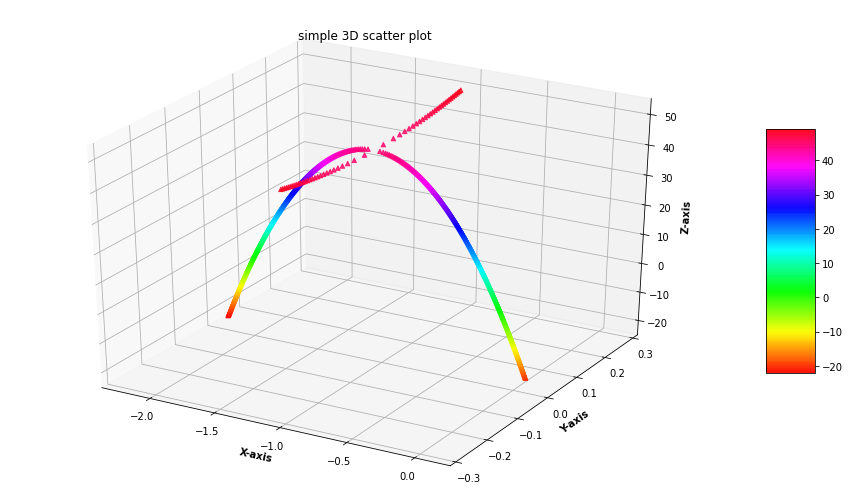

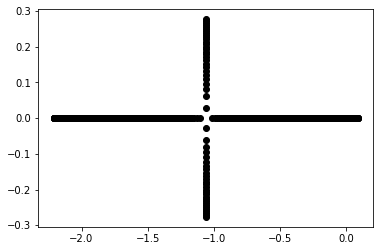

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
N=500
t=np.linspace(-20,50,N)
x=np.zeros(2*N)
y=np.zeros(2*N)
for k in range(0,N):
  g=t[k]
  banana=-1.06+np.lib.scimath.sqrt(0.9234-0.02*g)
  grapefruit=-1.06-np.lib.scimath.sqrt(0.9234-0.02*g)
  x[k]=banana.real
  y[k]=banana.imag
  x[k+N]=grapefruit.real
  y[k+N]=grapefruit.imag
z=np.append(t,t)
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

plt.plot(x, y, 'o', color='black');


## problem (2.)

Consider the following process model:

$$ P(s) = \frac{b(s)}{a(s)} = \frac{b_1 s^2 + b_2 s + b_3}{a_0 s^3 + a_1 s^2 + a_2 s + a_3} $$

where $b_1,b_2,b_3$ and $a_0,a_1,a_2,a_3$ are nonzero parameters.

### subproblem (2a.)

Suppose $a_0 = -1$, $a_2 = -3$, $a_3 = -2$; what range of values for $a_1$ ensure $P$ is stable? You *cannot* use computational tools to obtain the range of values -- you must do any calculations by hand and show your work. 

In [ ]:
# import modules first
import numpy as np
import pylab as plt

# build ODE solver
def numerical_simulation(f,t,x,t0=0.,dt=1e-4,ut=None,ux=None,utx=None,return_u=False):
  """
  simulate x' = f(x,u) 

  input:
    f : R x X x U --> X - vector field
      X - state space (must be vector space)
      U - control input set
    t - scalar - final simulation time
    x - initial condition; element of X

    (optional:)
    t0 - scalar - initial simulation time
    dt - scalar - stepsize parameter
    return_u - bool - whether to return u_

    (only one of:)
    ut : R --> U
    ux : X --> U
    utx : R x X --> U

  output:
    t_ - N array - time trajectory
    x_ - N x X array - state trajectory
    (if return_u:)
    u_ - N x U array - state trajectory
  """
  t_,x_,u_ = [t0],[x],[]
  
  inputs = sum([1 if u is not None else 0 for u in [ut,ux,utx]])
  assert inputs <= 1, "more than one of ut,ux,utx defined"

  if inputs == 0:
    assert not return_u, "no input supplied"
  else:
    if ut is not None:
      u = lambda t,x : ut(t)
    elif ux is not None:
      u = lambda t,x : ux(x)
    elif utx is not None:
      u = lambda t,x : utx(t,x)

  while t_[-1]+dt < t:
    if inputs == 0:
      _t,_x = t_[-1],x_[-1]
      dx = f(t_[-1],x_[-1]) * dt
    else:
      _t,_x,_u = t_[-1],x_[-1],u(t_[-1],x_[-1])
      dx = f(_t,_x,_u) * dt
      u_.append( _u )

    x_.append( _x + dx )
    t_.append( _t + dt )

  if return_u:
    return np.asarray(t_),np.asarray(x_),np.asarray(u_)
  else:
    return np.asarray(t_),np.asarray(x_)

## problem (3.)

Consider a simplified dynamics of vehicle steering, where the orientation $\theta$ of the vehicle is controlled by the steering angle $\delta$. The states of the system are $y,\theta$, with $y$ being the position of the center of mass of the car and $\theta$ as the orientation of the vehicle. We define the nonlinear system $(\text{NL}$): 

$$ \dot{y}=v_0\sin(\alpha(\delta)+\theta), \text{   } \dot{\theta}=\frac{v_0 \sin \alpha(\delta)}{a},\text{   where } \alpha(\delta)=\arctan(\frac{a\tan \delta}{b})$$

Let $a$ be the distance between the center of mass of the car and the rear wheel, and $b$ be the wheelbase.  

### subproblem (3a.)

Let $v_0=30 \text{ mph}, a=1.5\text{ m}, b=3\text{ m}, \delta=0$. Create a phase portrait of $(\text{NL})$ on the square $x_1,x_2\in(-1.5,+1.5)$ <mark>where $x_1, x_2$ are the states of the system</mark>:  use ``plt.quiver`` or ``plt.streamplot`` as in the examples presented in lecture / provided on homework solutions. 



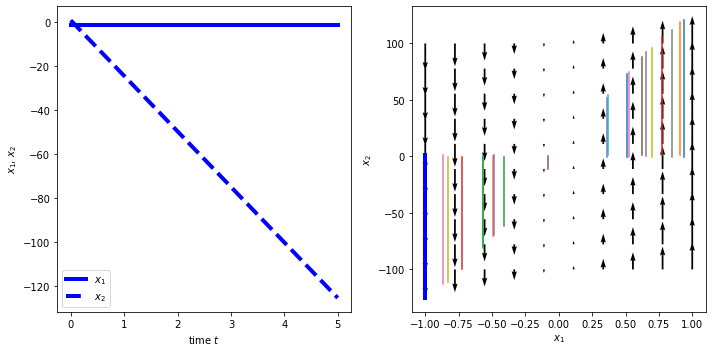

In [ ]:

v0 = 30
a = 1.5
b = 3

def f(t,x,u):
  theta, y = x
  alf = np.arctan(a/b*np.tan(u))
  dtheta = (v0*np.sin(alf))/a
  dy = v0*np.sin(alf+theta)
  return np.array([dtheta, dy])



plt.figure(figsize=(10,5))
dt = 1e-2
# initial condition
x10,x20 = (-1.,1.)
x0 = np.array([x10,x20])

# simulation time−−
t = 5

t_,x_ = numerical_simulation(f,t,x0,dt=dt,ut=lambda t : 0)
q_,dq_ = x_[:,0],x_[:,1]

# state vs time
ax = plt.subplot(1,2,1)
ax.set_xlabel(r'time $t$')
ax.set_ylabel(r'$x_1$, $x_2$')
plt.plot(t_,q_,'b',lw=4,label='$x_1$')
plt.plot(t_,dq_,'b--',lw=4,label='$x_2$')
plt.legend()

# phase portrait / "quiver" plot
ax = plt.subplot(1,2,2)
Q, Qd = np.meshgrid(np.linspace(-1,+1, 10), np.linspace(-100, +100, 10))
dQ,dQd = np.asarray([f(0.,(q,dq),0.).flatten() for q,dq in zip(Q.flatten(),Qd.flatten())]).T
dQ,dQd = dQ.reshape(dQ.shape),dQd.reshape(Qd.shape)
ax.quiver(Q,Qd,dQ,dQd)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.plot(q_,dq_,'b',lw=4)

for _ in range(20):
  # random initial condition in [-1,+1] x [-1,+1] square
  x0 = 2*(np.random.rand(2) - .5)
  t_,x_ = numerical_simulation(f,t,x0,dt=dt,ut=lambda t : 0)
  q_,dq_ = x_[:,0],x_[:,1]
  ax.plot(q_,dq_)
  

plt.tight_layout()

### subproblem (3b.)

Consider the phase portrait below. Visually inspect and identify all equilibrium point(s); are the equilibrium point(s) stable or unstable and why?

*Alt text: A graph labeled $x_1$ on the horizontal axis and $x_2$ on the vertical axis spanning $-1.5 < x_1 < 1.5, -1.5 < x_2 < 1.5$. Above the $x_2$ axis, horizontal arrows point towards the right increasing in length as $x_2$ increases in value. Below the $x_2$ axis, horizontal arrows point towards the left increasing in length as $x_2$ decreases in value.*


![phase portrait](https://drive.google.com/uc?id=1X_z0uWBIpQh50o_WHYTzulS7XIsKUkGp)

**Solution:**
It can be seen that all the points of $x_2 = 0$ are equilibrium points. These points are unstable because a small movement of $x_2$ will cause the diverging of the states.

## problem (4.)

Consider the nonlinear system 

$$\dot{q_1} = q_1 -q_2 - q_1(q_1^2+q_2^2)+u$$
$$\dot{q_2} = q_1 + q_2 - q_2(q_1^2+q_2^2)$$

### subproblem (4a.)

Linearize the nonlinear system about its equilibrium point $(x_e,u_e)=(0,0)$, that is find matrices $A, B$ such that $\dot{x} = Ax+Bu$ for $x,u$ near $x_e,u_e$

**Solution:**\
In state-space form, the nonlinear system is
$$\dot{x} = \frac{d}{dt} \left[\begin{matrix} q_1 \\ q_2 \end{matrix}\right] = \left[\begin{matrix} -q_1^3 - q_1q_2^2 + q_1 - q_2 +u \\ -q_2^3 - q_1^2q_2 + q_1 + q_2 \end{matrix}\right] = f(x).$$

The Jacobian derivative of $f$ with respect to $x$ is
$$ \partial_q f = \left[\begin{matrix} \partial_{q_1} \dot{q}_1 &  \partial_{q_2} \dot{q}_1 \\  \partial_{q_1} \dot{q}_2 &  \partial_{q_2} \dot{q}_2 \end{matrix}\right] = \left[\begin{matrix} -3q_1^2-q_2^2+1 & -2q_1q_2-1 \\ -2q_1q_2+1 & -3q_2^2-q_1^2+1 \end{matrix}\right].$$

Evaluating the Jacobian at $x_e = 0$ yields
$$\partial_q f(q_e) = \boxed{\left[\begin{matrix} 1 & -1 \\ 1 & 1 \end{matrix}\right] = A}$$

The Jacobian derivative of $f$ with respect to $u$ is
$$ \partial_u f = \left[\begin{matrix} \partial_{u} \dot{q}_1  \\  \partial_{u} \dot{q}_2  \end{matrix}\right] = \left[\begin{matrix} 1 \\ 0 \end{matrix}\right].$$

Evaluating the Jacobian at $x_e = 0$ yields
$$\partial_u f(q_e) = \boxed{\left[\begin{matrix} 1 \\ 0 \end{matrix}\right] = B}$$

### subproblem (4b.)

Let $u=-k_Pq_2$. Does there exist a $k_P$ such that the closed-loop system is stable, and if so, give one such $k_P$. If not, explain why. 

**Solution:**\
First, the open-loop stability:\
Eigenvalues are determined by the fomula $$\operatorname{det}(A-\lambda I) = 0$$

$\operatorname{det}\left(\left[\begin{matrix} 1 & -1 \\ 1 & 1 \end{matrix}\right] - \lambda\left[\begin{matrix} 1 & 0 \\ 0 & 1 \end{matrix}\right]\right) = 0$   

$\Leftrightarrow\lambda = 1+i, 1-i$\
It can be seen that the system is unstable.

If $u=-k_Pq_2$,
in state-space form, the nonlinear system is
$$\dot{x} = \frac{d}{dt} \left[\begin{matrix} q_1 \\ q_2 \end{matrix}\right] = \left[\begin{matrix} -q_1^3 - q_1q_2^2 + q_1 - q_2 -k_Pq_2 \\ -q_2^3 - q_1^2q_2 + q_1 + q_2 \end{matrix}\right] = f(x).$$

The Jacobian derivative of $f$ with respect to $x$ is
$$ \partial_q f = \left[\begin{matrix} \partial_{q_1} \dot{q}_1 &  \partial_{q_2} \dot{q}_1 \\  \partial_{q_1} \dot{q}_2 &  \partial_{q_2} \dot{q}_2 \end{matrix}\right] = \left[\begin{matrix} -3q_1^2-q_2^2+1 & -2q_1q_2-1 - k_p \\ -2q_1q_2+1 & -3q_2^2-q_1^2+1 \end{matrix}\right].$$

Evaluating the Jacobian at $x_e = 0$ yields
$$\partial_q f(q_e) = \boxed{\left[\begin{matrix} 1 & -1 - k_p \\ 1 & 1 \end{matrix}\right] = A}$$

Similarly, the eigenvalue can be determined by:

$\operatorname{det}\left(\left[\begin{matrix} 1 & -1-kp \\ 1 & 1 \end{matrix}\right] - \lambda\left[\begin{matrix} 1 & 0 \\ 0 & 1 \end{matrix}\right]\right) = 0$   

Solve it and we have:

$\lambda = 1 \pm \sqrt{-k_p - 1}$

It can be seen that regardless of $k_p$, one of the eigenvalue is alwasy positive, thus there is no $k_p$ such that the closed-loop system is stable


In [ ]:
A = np.array([[1,-1],[1,1]])
np.linalg.eig(A)

kp = -1
A = np.array([[1,-1-kp],[1,1]])
np.linalg.eig(A)

(array([1., 1.]), array([[ 0.00000000e+00,  2.22044605e-16],
        [ 1.00000000e+00, -1.00000000e+00]]))

## problem (5.)

Consider modeling the velocity of an underwater vehicle as 

$$ \dot{q}_1 = aq_2^3-bq_1|q_1| $$
$$ \dot{q}_2 = cu - dq_2^3 $$

 where <mark>$q_1,q_2$ are the states of the system, with</mark> $q_1$ being the horizontal velocity of the hull and $q_2$ being the velocity of the propellor that drives the hull. Assume $a,b,c,d > 0$ The term $aq_2^3$ relates propellor speed to the boat acceleration, while $-bq_1|q_1|$ is damping on the boat velocity. In the second equation, $cu$ is how the motor torques affect the propellor speed, and $-dq_2^3$ is damping on the propellor speed.

### subproblem (5a.)

Find an equilibrium point $x_e,u_e$ such that $q_1=1$ (ie the underwater vehicle is moving with a constant speed of 1).
